<a href="https://colab.research.google.com/github/rvt9bx/DS3001project_gss/blob/main/final_gss_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final General Social Survey Project
##by Eleanor Byrd, Ashley Whitehouse, Kian Putnam

###**Summary**


*****
Summary: A one paragraph description of the question, methods, and results (about 350 words). AT 280 NOW

The focus of this project was to investigate the correlation of variables in the General Social Survey data. Our group chose personal factors and perspectives such as age, income, political party affiliation, and religion to see the differing perspectives on capital punishment and perceived severity of the U.S. court system. Specifically, can a single demographic category shift the posture of society towards a more pitiless or subdued judicial system, and ultimately why would this occur? Our methods for discovering contrast in the selected population involved using a number of visual elements to discern differences. Through histograms and bar graphs, our group provided transparent portrayals of the counts and proportions of views through income brackets, political affiliations, and religious standings. Kernel Density plots were also employed to find the distribution of opinions by varying age. These visuals worked well to gather understanding of the dynamics driving beliefs favoring or opposing capital punishment and court rulings. Our analysis displayed interesting findings. Younger individuals generally favor more capital punishment and view the court system as not harsh enough compared to those who are older. Income showed no significant difference between socioeconomic classes. Political party affiliation did have a trend, with the Republican party affiliates generally more in favor of capital punishment compared to democrats. Religious affiliations exhibited slight differences; Buddhists generally showed the greatest opposition to capital punishment. Examination of how the above personal factors shape viewpoints towards capital punishment and the court system's harshness allows for a deeper understanding of the weight personal demographics have in forming society's outlook on crime and punishment. Not only this, but also how personal factors can cast a critical view of the individuals who are committing the crimes.

###**Data**

All of the data and key variables utilized were collected and produced through the General Social Survey. This survey holds a large number of variables concerning a wide range of categories. All of the original cleaning can be found in the gss_cleaning.ipynb file. Below are the variables that we focused on from the dataset, and how they were prepared for the analysis:

CAPPUN:
*****

This variable was surveyed as "Do you favor or oppose the death penalty for persons convicted of murder?" The responses were either in favor, in opposition, or nans (don't know, no answer, or skipped question).
When cleaning, the nan categories were all grouped together into a no response category

COURTS:
*****

This was surveyed as "In general, do you think the courts in this area deal too harshly or not harshly enough with criminals?" The responses were either too harshly, not harshly enough, about right, or nans (don't know, no answer). These nans were also replaces with a new category of no response.

INCOME and INCOM16:
*****

Income was surveyed as "In which of these groups did your total family income, from all sources, fall last year before taxes, that is?". The repsonses were dispensed into the following categories: under $1000, $1000 to $2999,$3000 to $3999, $4000 to $4999, $5000 to $5999, $6000 to $6999, $7000 to $7999, $8000 to $9999, $10000 to $14999, $15000 to $19999, $20000 to $24999, $25000 or more, or nan (not applicable).

Incom16 was surveyed as "Thinking about the time when you were 16 years old, compared with American families in general then, would you say your family income was:  far below average, below average, average, above average, or far above average?". Responses included far below average, below average, average, above average, far above average, or nan (don't know, no answer, not applicable, skipped question).

In both variables, the nans were coded into a new category of no response.

RELIG, RELITEN, and FUND:
*****

Relig was surveyed as "What is your religious preference? Is it Protestant, Catholic, Jewish, some other religion, or no religion?" Responses included Protestant, Jewish, none, other, Buddhism, Hinduism, other eastern religions, Muslim/Islam, Orthodox-Christian, Christian, Native American, inter-nondenominational, or nan (don't know, no answer, skipped question).

Reliten was surveyed as "Would you call yourself a strong (PREFERENCE NAMED IN RELIG) or a not very strong (PREFERENCE NAMED IN RELIG)?" Responses included strong, not very strong, somewhat strong, or nan (don't know, no answer, not applicable).

Fund was surveyed as the "Fundamentalism/Liberalism of Respondent's Religion" Responses included fundamentalist, moderate, liberal, or nan (no answer, not applicable, skipped question).

There were multiple choices made with these variables to make sure that they all corresponded with the other variable's codes.

*   set relig variable = other if fund or reliten had specific values
*   set relig variable = none if fund or reliten was coded as no religion
*   set fund variable = no religion if relig = none
*   set reliten variable = no religion if relig = none
*   take out the (vol.) from somewhat strong in reliten variable
*   convert all other nan to no response

PARTYID:
*****

Partyid was surveyed as "Generally speaking, do you usually think of yourself as a Republican, Democrat, Independent, or what?" Responses included: strong democrat, not very strong democrat, independent/close to democrat, independent (neither, no response), independent/close to republican, not very strong republican, strong republican, other party, or nan (no answer). Given that no response is already a category included in the independent observation and can't be separated, the nans were also coded into this category. Further, that specific observation was renamed to "independent, neither, or no response".

AGE:
*****

Age was surveyed as the respondant's age. Responses included 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80 or over, or nan (no answer). This variable was converted into a numeric variable and the nans were not changed (didn't want to take away the data).

All other variables that were cleaned but not used in analysis can be found in the Appendix(1).

After handling missing data, fixing inconsistencies and discrepencies, and recoding some observations, the data was ready to be analysed.


###**Results**

In [2]:
! git clone https://www.github.com/rvt9bx/DS3001project_gss

Cloning into 'DS3001project_gss'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 52 (delta 21), reused 11 (delta 9), pack-reused 26
Receiving objects: 100% (52/52), 27.35 MiB | 18.01 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./DS3001project_gss/clean_gss_data.csv")

Here is a brief look at all of the selected variables

In [7]:
df.head()

,id,age,sex,educ,educ_level,marital,childs,wrkstat,income,incom16,partyid,relig,fund,reliten,courts,cappun
0,1,23.0,female,16.0,4 years of college,never married,0.0,working full time,no response,average,"independent, close to democrat",jewish,liberal,no response,about right,no response
1,2,70.0,male,10.0,10th grade,married,5.0,retired,no response,above average,not very strong democrat,catholic,moderate,no response,not harshly enough,no response
2,3,48.0,female,12.0,12th grade,married,4.0,working part time,no response,average,"independent, neither, or no response",protestant,moderate,no response,not harshly enough,no response
3,4,27.0,female,17.0,5 years of college,married,0.0,working full time,no response,average,not very strong democrat,other,no response,no response,about right,no response
4,5,61.0,female,12.0,12th grade,married,2.0,keeping house,no response,below average,strong democrat,protestant,moderate,no response,not harshly enough,no response


OVERALL DISTRIBUTION:
*****

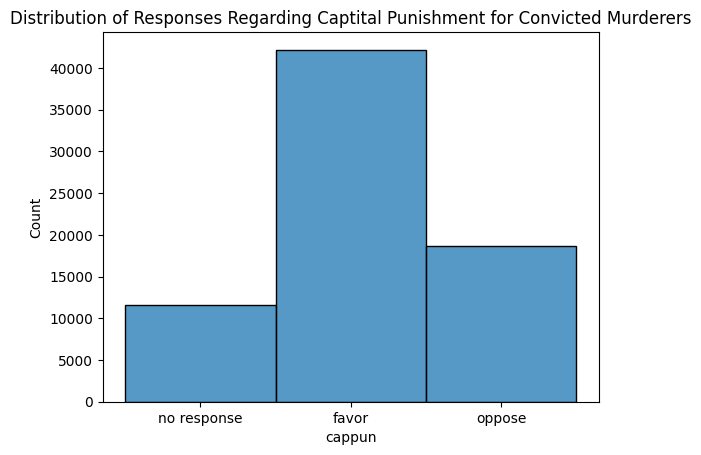

Text(0.5, 1.0, 'Distribution of Responses Regarding how Courts deal with Criminals')

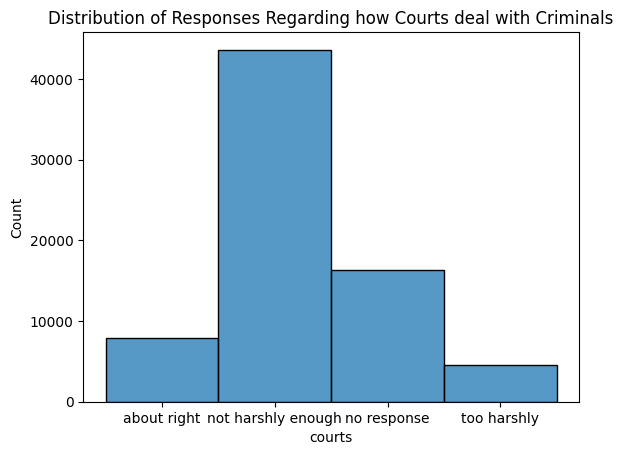

In [8]:
plot, axes = plt.subplots()
sns.histplot(data=df, x='cappun')
plt.title("Distribution of Responses Regarding Captital Punishment for Convicted Murderers")
plt.show()
sns.histplot(data=df, x='courts')
plt.title("Distribution of Responses Regarding how Courts deal with Criminals")

Above are the overall trends for the cappun and courts variables. Accross all people, about 42,000 favor capital punishment and 18,500 oppose it. 11,500 people had no response.

In terms of the court system, 43,000 people believed the courts did not deal with criminals harshly enough, 8,000 people beleived it was about right, and only 4,500 people believed the courts dealt with criminals too harshly.

AGE:
*****

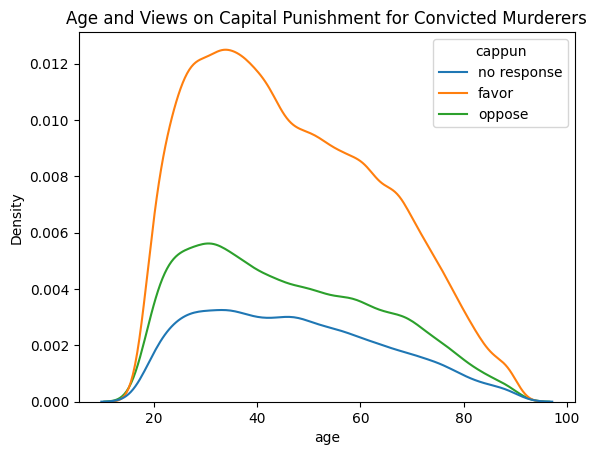

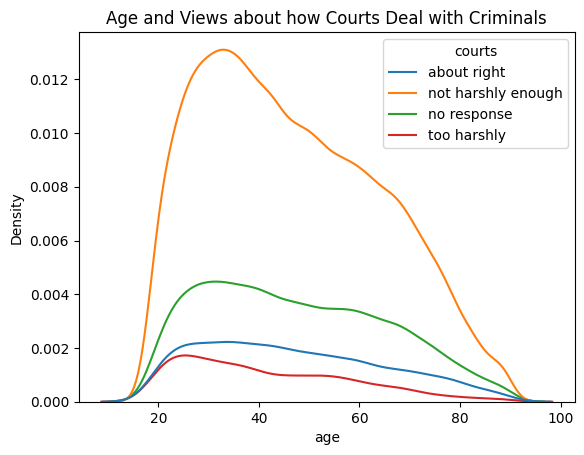

In [9]:
plot, axes = plt.subplots()
sns.kdeplot(data=df,x='age',hue='cappun')
plt.title('Age and Views on Capital Punishment for Convicted Murderers')
plt.show()
sns.kdeplot(data=df, x='age', hue='courts')
plt.title('Age and Views about how Courts Deal with Criminals')
plt.show()

As shown in the graphs, more people who are younger favor capital punishment and believe that courts do not deal with criminals harshly enough. The peak of the density curves for these two observations is around age 35, and begins to decline after.

INCOME:
*****

<Axes: title={'center': 'Proportion of Court Opinions by Income Level'}, xlabel='incom16', ylabel='proportion'>

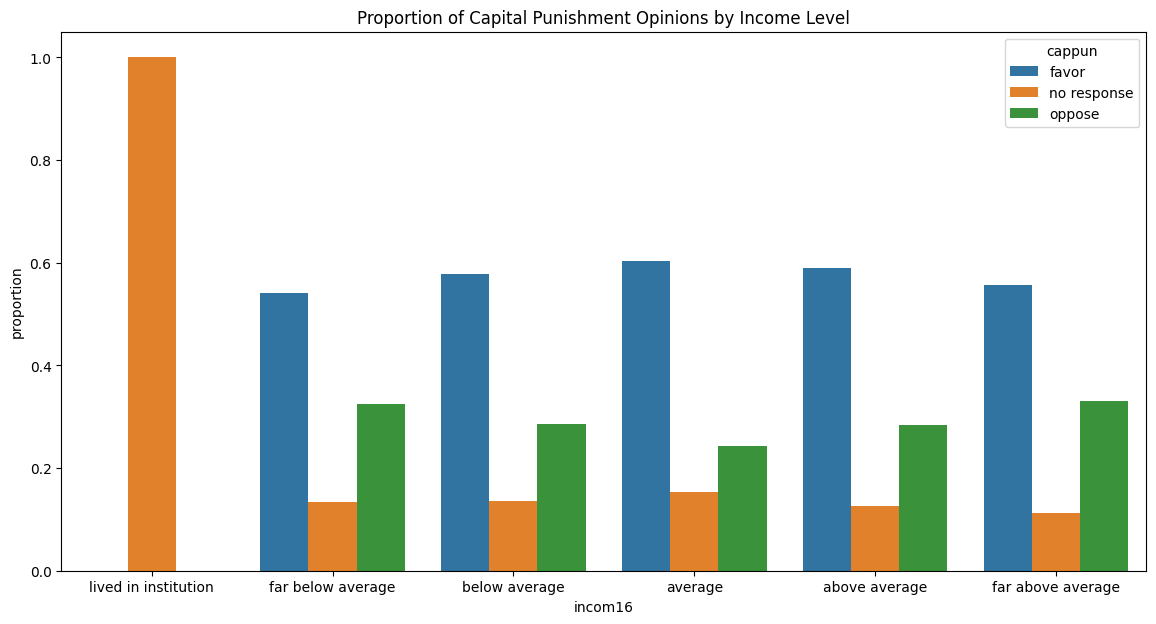

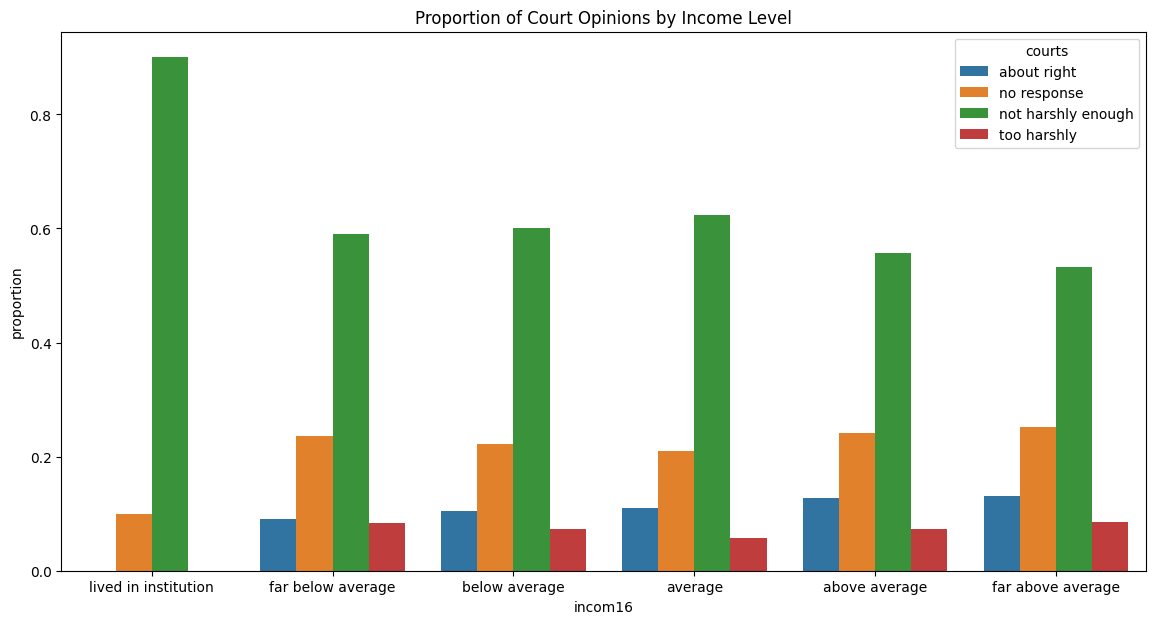

In [11]:
plt.figure(figsize=(14, 7))
counts = df.groupby(['incom16', 'cappun'], as_index=False).size()
s = counts.groupby('incom16')['size'].transform('sum')
counts['proportion'] = counts['size'].div(s)
plt.title("Proportion of Capital Punishment Opinions by Income Level")
sns.barplot(data=counts, x='incom16', y='proportion', hue='cappun', order=['lived in institution', 'far below average', 'below average', 'average', 'above average', 'far above average'])

plt.figure(figsize=(14, 7))
counts = df.groupby(['incom16', 'courts'], as_index=False).size()
s = counts.groupby('incom16')['size'].transform('sum')
counts['proportion'] = counts['size'].div(s)
plt.title("Proportion of Court Opinions by Income Level")
sns.barplot(data=counts, x='incom16', y='proportion', hue='courts', order=['lived in institution', 'far below average', 'below average', 'average', 'above average', 'far above average'])

Interestingly, it seems that differing income levels have almost no effect on the views of capital punishment and the court system. Regardless of the income level, most people in the bracket

The one difference between groups are people who lived in an institution: their opinions on the court system are much stronger for not being harsh enough, and almost no one from that group believed that the court system's harshness was about right.

POLITICAL PARTY:
*****

<Axes: title={'center': 'Proportion of Court Opinions by Political Party'}, xlabel='partyid', ylabel='proportion'>

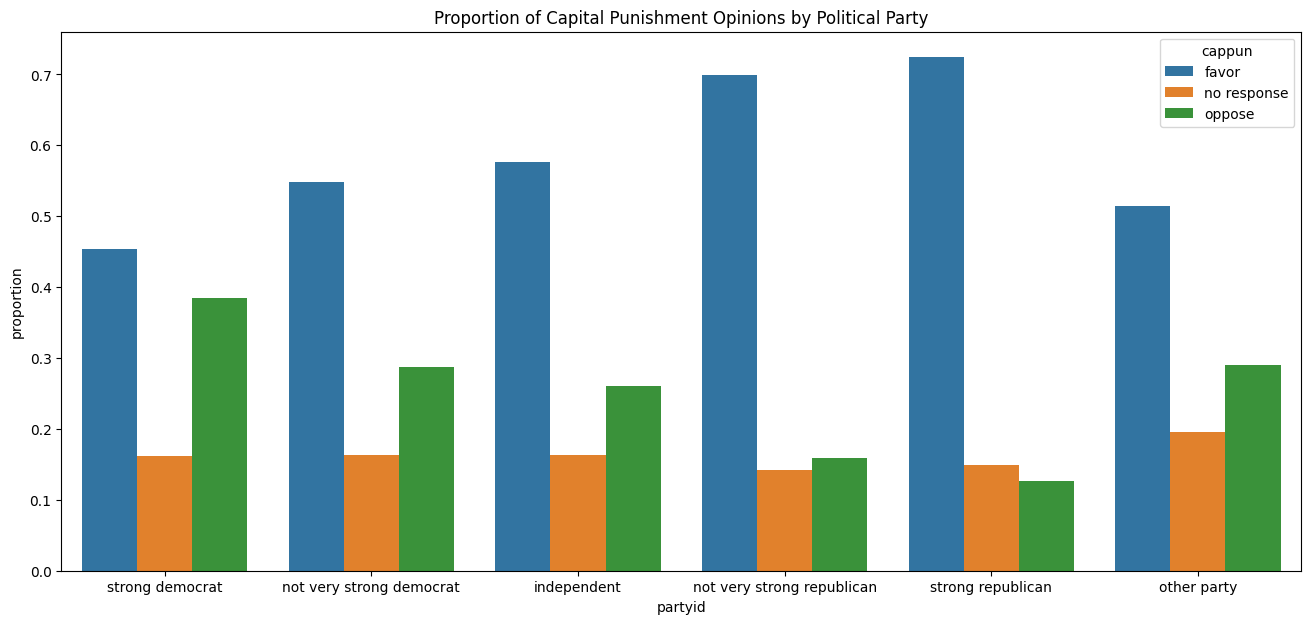

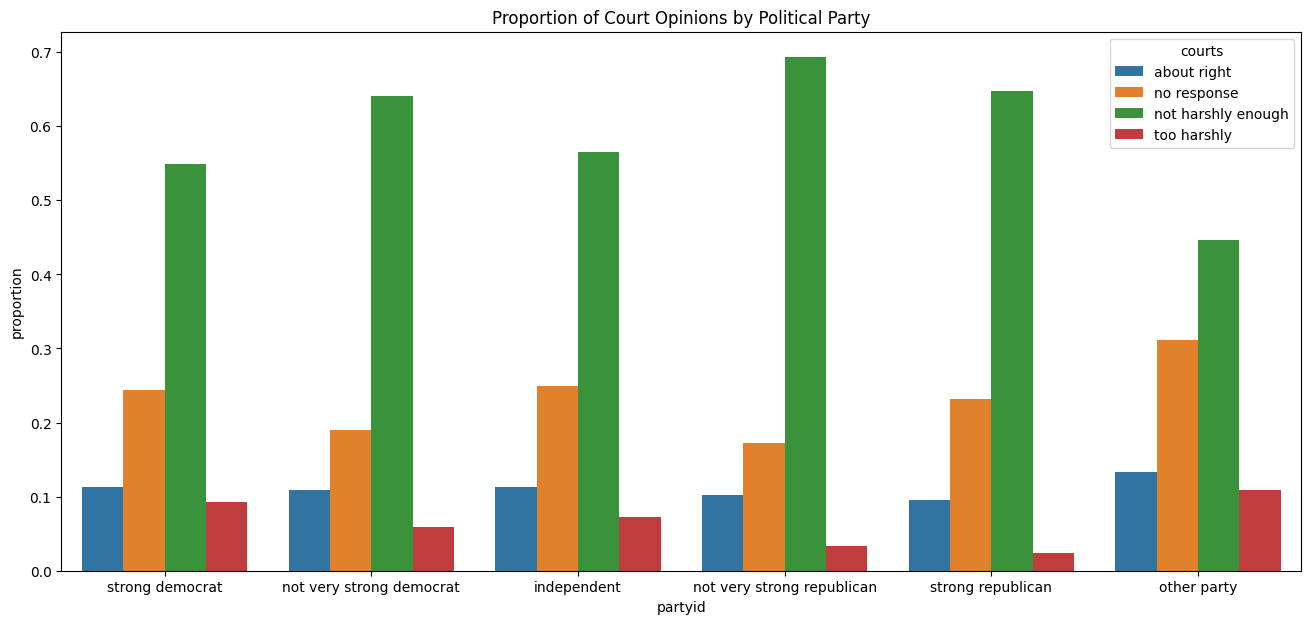

In [12]:
plt.figure(figsize=(16, 7))
partyid = df['partyid']
partyid = partyid.replace(['independent, close to democrat', 'independent, neither, or no response','independent, close to republican'],'independent')
df['partyid'] = partyid
counts = df.groupby(['partyid', 'cappun'], as_index=False).size()
s = counts.groupby('partyid')['size'].transform('sum')
counts['proportion'] = counts['size'].div(s)
plt.title("Proportion of Capital Punishment Opinions by Political Party")
sns.barplot(data=counts, x='partyid', y='proportion', hue='cappun', order=["strong democrat", "not very strong democrat", "independent", "not very strong republican", "strong republican", "other party"])

plt.figure(figsize=(16, 7))
partyid = df['partyid']
partyid = partyid.replace(['independent, close to democrat', 'independent, neither, or no response','independent, close to republican'],'independent')
df['partyid'] = partyid
counts = df.groupby(['partyid', 'courts'], as_index=False).size()
s = counts.groupby('partyid')['size'].transform('sum')
counts['proportion'] = counts['size'].div(s)
plt.title("Proportion of Court Opinions by Political Party")
sns.barplot(data=counts, x='partyid', y='proportion', hue='courts', order=["strong democrat", "not very strong democrat", "independent", "not very strong republican", "strong republican", "other party"])

The proportion of responses that are in favor of capital punishment seem to increase as political party affiliation goes from strong democrat to strong republican.

In terms of the court system's treatment of criminals, the proportion of responses that view the courts deal as too harsh slightly decreases as political party goes from strong democrat to strong republican.

RELIGION:
*****


<Axes: title={'center': 'Proportion of Court Opinions by Religion'}, xlabel='relig', ylabel='proportion'>

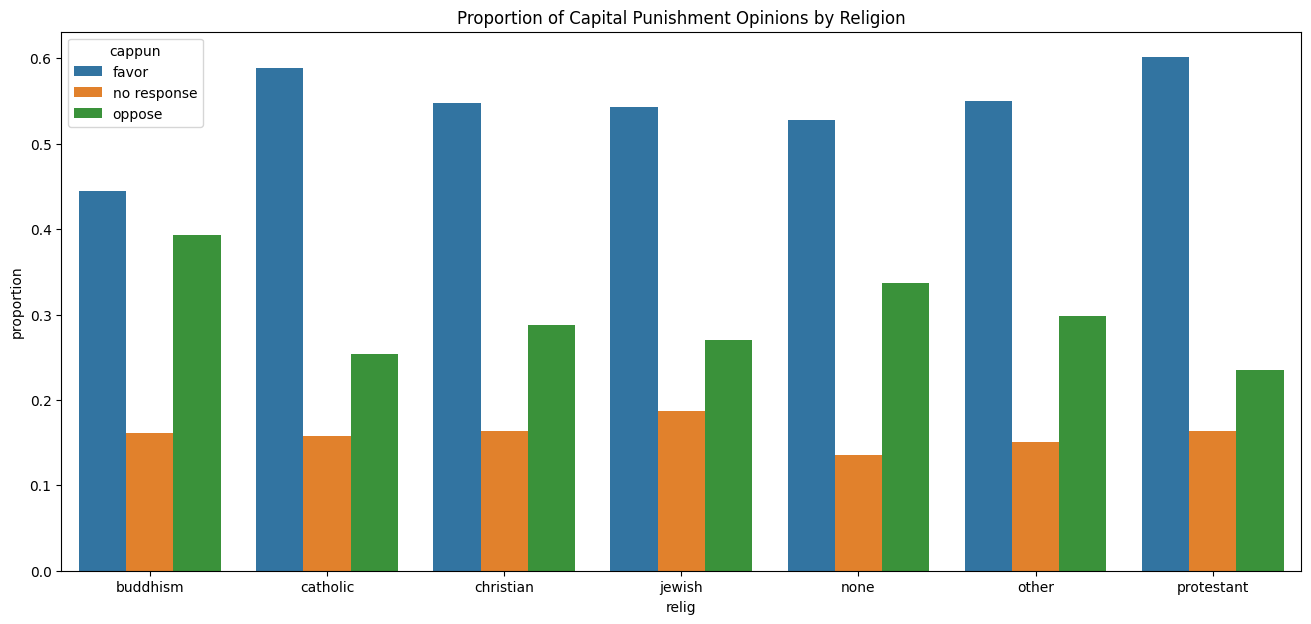

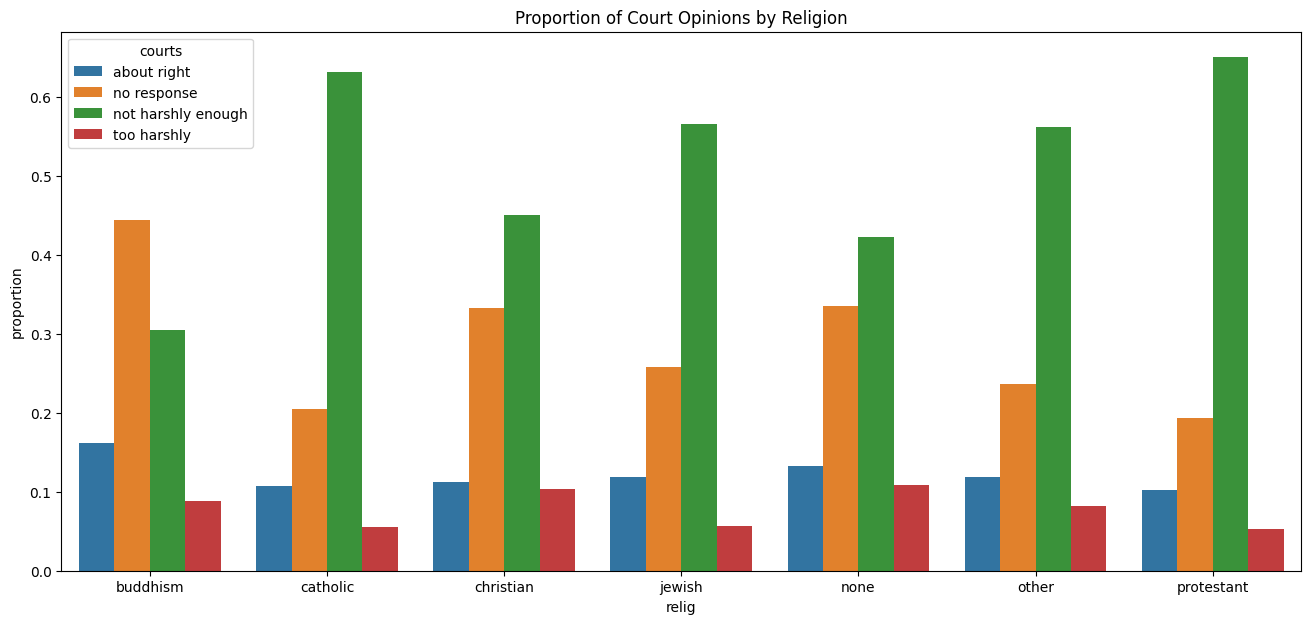

In [13]:
plt.figure(figsize=(16, 7))
religions = df[df['relig'].isin(['protestant', 'catholic', 'none', 'other', 'jewish', 'christian', 'buddhism'])] # most popular 7 religions
counts = religions.groupby(['relig', 'cappun'], as_index=False).size()
s = counts.groupby('relig')['size'].transform('sum')
counts['proportion'] = counts['size'].div(s)
plt.title("Proportion of Capital Punishment Opinions by Religion")
sns.barplot(data=counts, x='relig', y='proportion', hue='cappun')

plt.figure(figsize=(16, 7))
counts = religions.groupby(['relig', 'courts'], as_index=False).size()
s = counts.groupby('relig')['size'].transform('sum')
counts['proportion'] = counts['size'].div(s)
plt.title("Proportion of Court Opinions by Religion")
sns.barplot(data=counts, x='relig', y='proportion', hue='courts')

People grouped in Buddhism have the highest proportion of responses that oppose the death penalty, followed by the group with no religious affiliation. Protestants and Catholics have the highest proportion of responses that are in favor of the death penalty at about 60% of the category. Protestants and Catholics also have the highest proportion of responses that think the courts do not treat criminals harshly enough. Buddhists have by far the lowest proportion of respondants who believe the courts don't treat criminals harshly enough; however, this data may be swayed because a large proportion of Buddhists did not provide a response.

###**Conclusion**

This analysis of perspectives on capital punishment and the U.S. court system exhibits some compelling orientations correlated to personal demographics

When observing age, we found that when people are younger, they are more in favor of capital punishment then older people. There is a large rise in favor from the 10-19 category to the 20-30 category, followed by high favoritism until around age 35, when favoritism of capital punishment begins to decline again. This result may be due to differing generational attitudes of justice or simply because as one gets older, they have more retrospection about life in general.

Looking at the income levels, there wasn't much of a difference on perspective of capital punishment or the court system decisions across the brackets of income. This was suprising due to the common opinion that socioeconomic status has influence towards crime and punishment, but rather implies that economic status may not play much of a role in outlook on the system.

Political party affiliation was a variable that did display a change of perspective across categories. Those more on the strong democrat side of politics were opposed to capital punishment, and as the viewpoint shifts towards strongly republican, the proportion of people favoring capital punishment notably increases. With this data, it gives the impression that republicans are generally more supportive of capital punishment and democrats are not. This may also reflect larger differences between political parties when it comes to punishment and equity.

Religious affiliation also unveiled differences towards capital punishment and the court system's decisions Buddhists and none religious affiliated people had the highest proportion of people opposing capital punishment, while Protestants and Catholics had the highest proportion of people in favor of capital punishment. They also perceived the courts as not harsh enough, and Buddhists had a very low proportion of people who believed the courts were not harsh enough. As noted earlier, a significant amount of the Buddhist affiliated people did not provide a response, so their data may cause bias in the trend.

This project gives a valuable snapshot into some of the many variables that may play a role in how people view capital punishment, court systems, and criminals in the United States. Age, income, political affiliation, and religion may shape people's perspective, but that is not what this project is meant for. This project does not insinuate causation, instead it is simply correlation.

As with any study, the biggest limitation is that the results only represent the people in the dataset, not society at large. More data can be gathered to see if the trends that were found remain true. Other limitations can include correlated variables that weren't included in our project or in the entire dataset, and biases from the individual's attitudes. Overall, this project does a satisfactory job at starting to create shape in understanding how personal factors shape individual's views on justice and punishment.

Further work can be done to understand the possible ideologies behind political differences on views of capital punishment and court's harshness. It would also be interesting to see how culture, where and how someone grew up, shapes their standpoint on these controversial issues. This project is the start to how people may advance discussions on criminal justice reform and fair treatment of people in the court system.


###**Appendix**


Appendix: If you have a significant number of additional plots or tables that you feel are essential to
 the project, you can put any amount of extra content at the end and reference it from the body of the
 paper.

#### 1- Additional variables that were cleaned but not used in analysis:

WRKSTAT:
*****

wrkstat was surveyed as "Last week were you working full time, part time, going to school, keeping house, or what?" Responses included working full time, working part time, with a job but not at work because of temporary illness, vacation, unemployed/laid off/looking for work, retired, in school, keeping house, other, or nan (don't know, no answer, skipped on web). When cleaning, the nans were lumped into the other category.

CHILDS:
*****

Childs was surveyed as " How many children have you ever had? Please count all that were born alive at any time (including any you had from a previous marriage)." Responses included none, one, two, three, four, five, six, seven, eight or more, and nan (not applicable). When cleaning, the variable was changed to a numeric form, and nan values were not changed (didn't want to take away the data).

MARITAL:
*****

Marital was surveyed as "Are you currently married, widowed, divorced, separated, or have you never been married?" Responses included married, widowed, divorced, separated, never married, or nan (don't know, no answer, skipped question). When cleaning, the nans were converted to a new category called no response.

EDUC:
*****

Educ was surveyed as the respondant's highest education level. Responses inlcuded no formal schooling, separate grades from 1st to 12th, 1 year of college, 2 years of college, 3 years of college, 4 years of college, 5 years of college, 6 years of college, 7 years of college, 8 years of college, or nan (no answer). When cleaning, the variable data was converted to the numeric type, and a new column was introduced (educ_level) which converted numeric values to the level of education (no formal schooling is 0, 8 years of college is 20). Nan values were changed to no response.

SEX:
*****

Sex was surveyed as the respondant's sex. Responses included male, female, and nan (don't know, no answer, skipped question). During cleaning, all nans were converted to a no response category.